# A notebook for the MSE plots

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## MSE plot for the real product of Gaussians, with different $\gamma \in \{0.5,1,2\}$

In [13]:
gammas = [0.5,1.0,2.0]
mses_TAP_mean = np.array([None for gamma in gammas])
mses_TAP_std = np.array([None for gamma in gammas])
mses_MM_mean = np.array([None for gamma in gammas])
mses_MM_std = np.array([None for gamma in gammas])
mses_LAMP_largest_mean = np.array([None for gamma in gammas])
mses_LAMP_largest_std = np.array([None for gamma in gammas])
mses_LAMP_closest_mean = np.array([None for gamma in gammas])
mses_LAMP_closest_std = np.array([None for gamma in gammas])
alphas = np.array([None for gamma in gammas])

In [14]:
#Loading spectral data
for (i_g,gamma) in enumerate(gammas):
    filename = "Data/results_gaussian_product_"+str(gamma)+"_channel_noiseless.pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    alphas[i_g] = results['alphas']
    results = results['results']
    mses_TAP_mean[i_g] = np.array([1-results[i]['q_TAP'][0]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_TAP_std[i_g] = np.array([results[i]['q_TAP'][1]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_MM_mean[i_g] = np.array([1-results[i]['q_MM'][0]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_MM_std[i_g] = np.array([results[i]['q_MM'][1]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_LAMP_largest_mean[i_g] = np.array([1-results[i]['q_LAMP'][0]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_LAMP_largest_std[i_g] = np.array([results[i]['q_LAMP'][1]['Largest'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_LAMP_closest_mean[i_g] = np.array([1-results[i]['q_LAMP'][0]['Closest to 1'] for (i,alpha) in enumerate(alphas[i_g])])
    mses_LAMP_closest_std[i_g] = np.array([results[i]['q_LAMP'][1]['Closest to 1'] for (i,alpha) in enumerate(alphas[i_g])])

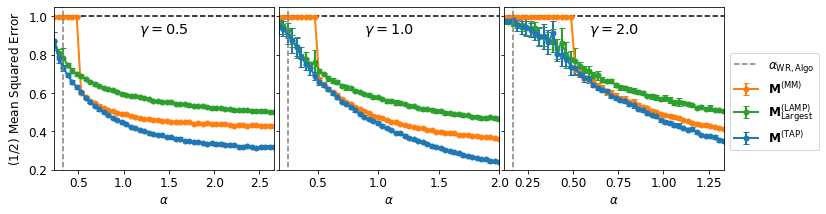

In [4]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1,3,figsize=(12,3),sharey=True)
for (i_g,gamma) in enumerate(gammas):
    ax = axes[i_g]
    ax.set_xlabel(r'$\alpha$')
    if i_g == 0:
        ax.set_ylabel(r'$(1/2)$ Mean Squared Error')
    ax.set_title(r"$\gamma = $"+str(gamma),x=0.5, y=0.8)
    alpha_WR = 0.5/(1+gamma)

    ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
    ax.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0)
    ax.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0)
    
    eb = ax.errorbar(alphas[i_g], mses_MM_mean[i_g], yerr = mses_MM_std[i_g], label =  r"$\mathbf{M}^\mathrm{(MM)}$", zorder = 1, linewidth =2 ,capsize = 3,fmt='-o',markersize=5,color='tab:orange')
    eb[-1][0].set_linestyle('-')
    eb = ax.errorbar(alphas[i_g], mses_LAMP_largest_mean[i_g], yerr = mses_LAMP_largest_std[i_g], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$", zorder = 1, linewidth =2 ,capsize = 3,fmt='-o',markersize=5,color='tab:green')
    eb[-1][0].set_linestyle('-')
    eb = ax.errorbar(alphas[i_g], mses_TAP_mean[i_g], yerr = mses_TAP_std[i_g], label =  r"$\mathbf{M}^\mathrm{(TAP)}$", zorder = 1, linewidth =2 ,capsize = 3,fmt='-o',markersize=5,color='tab:blue')
    eb[-1][0].set_linestyle('-')
    #eb = ax.errorbar(alphas[i_g], mses_LAMP_closest_mean[i_g], yerr = mses_LAMP_closest_std[i_g], label =  r"$\mathbf{M}^\mathrm{(LAMP)}_1$", zorder = 1, linewidth =2 ,capsize = 2,fmt='-o',markersize=3)
    #eb[-1][0].set_linestyle('-')

    ax.set_xlim(np.min(alphas[i_g]),np.max(alphas[i_g]))
    ax.set_ylim(0.2,1.05)
    
axes[1].legend(loc='upper center', bbox_to_anchor=(2.25, 0.75),ncol=1,fancybox=True)
plt.subplots_adjust(wspace=0.02)
plt.savefig('figures/mse_spectral_product_real_gaussian.pdf',bbox_inches = 'tight')

## Orthogonal matrices

In [5]:
#Loading spectral data for Hadamard
filename = "Data/results_hadamard_channel_noiseless.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_spectral_Hadamard = results['alphas']
results = results['results']


mses_TAP_spectral_mean_Hadamard = np.array([2-2*results[i]['TAP']['q_mean'] for (i,alpha) in enumerate(alphas_spectral_Hadamard)])
mses_TAP_spectral_std_Hadamard = np.array([2*results[i]['TAP']['q_std'] for (i,alpha) in enumerate(alphas_spectral_Hadamard)])
mses_MM_spectral_mean_Hadamard = np.array([2-2*results[i]['MM']['q_mean'] for (i,alpha) in enumerate(alphas_spectral_Hadamard)])
mses_MM_spectral_std_Hadamard = np.array([2*results[i]['MM']['q_std'] for (i,alpha) in enumerate(alphas_spectral_Hadamard)])
#Loading spectral data for orthogonal
filename = "Data/results_orthogonal_channel_noiseless.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_spectral_Haar = results['alphas']
results = results['results']

mses_TAP_spectral_mean_Haar = np.array([2-2*results[i]['TAP']['q_mean'] for (i,alpha) in enumerate(alphas_spectral_Haar)])
mses_TAP_spectral_std_Haar = np.array([2*results[i]['TAP']['q_std'] for (i,alpha) in enumerate(alphas_spectral_Haar)])
mses_MM_spectral_mean_Haar = np.array([2-2*results[i]['MM']['q_mean'] for (i,alpha) in enumerate(alphas_spectral_Haar)])
mses_MM_spectral_std_Haar = np.array([2*results[i]['MM']['q_std'] for (i,alpha) in enumerate(alphas_spectral_Haar)])

In [6]:
#Loading LAMP data for Hadamard
filename = "Data/results_hadamard_channel_noiseless_lamp.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_LAMP_Hadamard = results['alphas']
results = results['results']
mses_LAMP_spectral_mean_Hadamard = {'Largest':np.array([2-2*results[i]['q_LAMP'][0]['Largest'] for (i,alpha) in enumerate(alphas_LAMP_Hadamard)]),'Closest to 1':np.array([2-2*results[i]['q_LAMP'][0]['Closest to 1'] for (i,alpha) in enumerate(alphas_LAMP_Hadamard)])}
mses_LAMP_spectral_std_Hadamard = {'Largest':np.array([2*results[i]['q_LAMP'][1]['Largest'] for (i,alpha) in enumerate(alphas_LAMP_Hadamard)]),'Closest to 1':np.array([2*results[i]['q_LAMP'][1]['Closest to 1'] for (i,alpha) in enumerate(alphas_LAMP_Hadamard)])}
#Loading LAMP data for orthogonal
filename = "Data/results_orthogonal_channel_noiseless_lamp.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_LAMP_Haar = results['alphas']
results = results['results']
mses_LAMP_spectral_mean_Haar = {'Largest':np.array([2-2*results[i]['q_LAMP'][0]['Largest'] for (i,alpha) in enumerate(alphas_LAMP_Haar)]),'Closest to 1':np.array([2-2*results[i]['q_LAMP'][0]['Closest to 1'] for (i,alpha) in enumerate(alphas_LAMP_Haar)])}
mses_LAMP_spectral_std_Haar = {'Largest':np.array([2*results[i]['q_LAMP'][1]['Largest'] for (i,alpha) in enumerate(alphas_LAMP_Haar)]),'Closest to 1':np.array([2*results[i]['q_LAMP'][1]['Closest to 1'] for (i,alpha) in enumerate(alphas_LAMP_Haar)])}

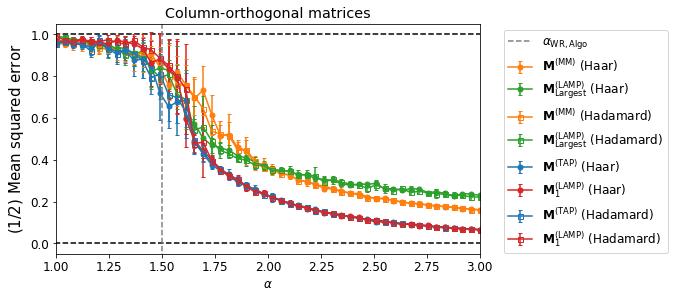

In [7]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10,4))
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$(1/2)$ Mean squared error',fontsize = 15)
ax.set_title(r'Column-orthogonal matrices')

alpha_WR = 1.5
ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
ax.plot([0.,10],[1.,1.],linestyle='--',color='black',zorder=0)
ax.plot([0.,10],[0.,0.],linestyle='--',color='black',zorder=0)
linewidth = 1.5
markersize = 5
capsize = 2 

eb = ax.errorbar(alphas_spectral_Haar, mses_MM_spectral_mean_Haar/2, yerr = mses_MM_spectral_std_Haar/2, label = r"$\mathbf{M}^\mathrm{(MM)}$ (Haar)", color = 'tab:orange', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_LAMP_Haar, mses_LAMP_spectral_mean_Haar['Largest']/2, yerr = mses_LAMP_spectral_std_Haar['Largest']/2, label = r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$ (Haar)", color = 'tab:green', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_spectral_Hadamard, mses_MM_spectral_mean_Hadamard/2, yerr = mses_MM_spectral_std_Hadamard/2, label = r"$\mathbf{M}^\mathrm{(MM)}$ (Hadamard)",  markerfacecolor='none',marker='s', color = 'tab:orange', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_LAMP_Hadamard, mses_LAMP_spectral_mean_Hadamard['Largest']/2, yerr = mses_LAMP_spectral_std_Hadamard['Largest']/2, label = r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$ (Hadamard)", markerfacecolor='none',marker='s', color = 'tab:green', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_spectral_Haar, mses_TAP_spectral_mean_Haar/2, yerr = mses_TAP_spectral_std_Haar/2, label = r"$\mathbf{M}^\mathrm{(TAP)}$ (Haar)", color = 'tab:blue', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_LAMP_Haar, mses_LAMP_spectral_mean_Haar['Closest to 1']/2, yerr = mses_LAMP_spectral_std_Haar['Closest to 1']/2, label = r"$\mathbf{M}^\mathrm{(LAMP)}_1$ (Haar)", color = 'tab:red', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_spectral_Hadamard, mses_TAP_spectral_mean_Hadamard/2, yerr = mses_TAP_spectral_std_Hadamard/2, label = r"$\mathbf{M}^\mathrm{(TAP)}$ (Hadamard)", markerfacecolor='none',marker='s', color = 'tab:blue', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
eb = ax.errorbar(alphas_LAMP_Hadamard, mses_LAMP_spectral_mean_Hadamard['Closest to 1']/2, yerr = mses_LAMP_spectral_std_Hadamard['Closest to 1']/2, label = r"$\mathbf{M}^\mathrm{(LAMP)}_1$ (Hadamard)",markerfacecolor='none',marker='s', color = 'tab:red', zorder = 1, linewidth = linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
eb[-1][0].set_linestyle('-')
min_alpha = min(min(alphas_spectral_Hadamard),min(alphas_spectral_Haar))
max_alpha = max(max(alphas_spectral_Hadamard),max(alphas_spectral_Haar))
ax.set_xlim(min_alpha,max_alpha)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1.0),ncol=1,fancybox=True)
plt.tight_layout()
plt.savefig('figures/mse_spectral_orthogonal.pdf',bbox_inches = 'tight')

## Complex Gaussian: noiseless and Poisson channel with $\Lambda = 1$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [9]:
#Noiseless
ensemble = "gaussian_complex"
channel = "noiseless" #can be noiseless,poisson
filename = "Data/results_"+ensemble+"_channel_"+channel+".pkl"
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()
alphas_noiseless = data['alphas']
results = data['results']

mses_TAP_mean_noiseless = np.array([1-results[i]['q_TAP'][0]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_TAP_std_noiseless = np.array([results[i]['q_TAP'][1]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_MM_mean_noiseless  = np.array([1-results[i]['q_MM'][0]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_MM_std_noiseless = np.array([results[i]['q_MM'][1]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_LAMP_largest_mean_noiseless  = np.array([1-results[i]['q_LAMP'][0]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_LAMP_largest_std_noiseless = np.array([results[i]['q_LAMP'][1]['Largest'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_LAMP_closest_mean_noiseless = np.array([1-results[i]['q_LAMP'][0]['Closest to 1'] for (i,alpha) in enumerate(alphas_noiseless)])
mses_LAMP_closest_std_noiseless = np.array([results[i]['q_LAMP'][1]['Closest to 1'] for (i,alpha) in enumerate(alphas_noiseless)])

In [10]:
#Poisson
ensemble = "gaussian_complex"
channel = "poisson" #can be noiseless,poisson
filename = "Data/results_"+ensemble+"_channel_"+channel+".pkl"
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()
alphas_poisson = data['alphas']
results = data['results']

mses_TAP_mean_poisson = np.array([1-results[i]['q_TAP'][0]['Largest'] for (i,alpha) in enumerate(alphas_poisson)])
mses_TAP_std_poisson = np.array([results[i]['q_TAP'][1]['Largest'] for (i,alpha) in enumerate(alphas_poisson)])
mses_LAMP_largest_mean_poisson  = np.array([1-results[i]['q_LAMP'][0]['Largest'] for (i,alpha) in enumerate(alphas_poisson)])
mses_LAMP_largest_std_poisson  = np.array([results[i]['q_LAMP'][1]['Largest'] for (i,alpha) in enumerate(alphas_poisson)])
mses_LAMP_closest_mean_poisson  = np.array([1-results[i]['q_LAMP'][0]['Closest to 1'] for (i,alpha) in enumerate(alphas_poisson)])
mses_LAMP_closest_std_poisson  = np.array([results[i]['q_LAMP'][1]['Closest to 1'] for (i,alpha) in enumerate(alphas_poisson)])

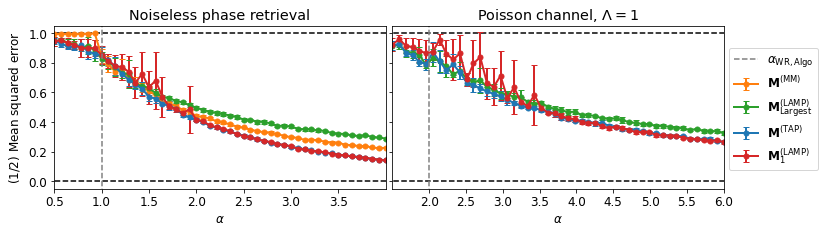

In [11]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1,2,figsize=(12,3),sharey=True,gridspec_kw={'width_ratios': [3, 3]})
channels = ["noiseless","poisson"]
linewidth = 2
markersize = 5
capsize = 3
for (i_a,ax) in enumerate(axes):
    channel = channels[i_a]
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$\alpha$')
    if i_a == 0:
        ax.set_ylabel(r'$(1/2)$ Mean squared error')
    
    if channel == "noiseless":
        ax.set_title("Noiseless phase retrieval")
        alpha_WR = 1.0
        ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
        ax.plot([0.,10],[1.,1.],linestyle='--',color='black',zorder=0)
        ax.plot([0.,10],[0.,0.],linestyle='--',color='black',zorder=0)

        eb = ax.errorbar(alphas_noiseless, mses_MM_mean_noiseless , yerr = mses_MM_std_noiseless , label = r"$\mathbf{M}^\mathrm{(MM)}$", color = 'tab:orange',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        eb = ax.errorbar(alphas_noiseless, mses_LAMP_largest_mean_noiseless , yerr = mses_LAMP_largest_std_noiseless , label = r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$", color = 'tab:green',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        eb = ax.errorbar(alphas_noiseless, mses_TAP_mean_noiseless , yerr = mses_TAP_std_noiseless , label = r"$\mathbf{M}^\mathrm{(TAP)}$",color = 'tab:blue', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        eb = ax.errorbar(alphas_noiseless, mses_LAMP_closest_mean_noiseless , yerr = mses_LAMP_closest_std_noiseless , label = r"$\mathbf{M}^\mathrm{(LAMP)}_1$",color = 'tab:red', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        ax.set_xticks(np.linspace(0.5,3.5,num=7))
        
        ax.set_xlim(np.min(alphas_noiseless),np.max(alphas_noiseless))
    
    if channel == "poisson":
        ax.set_title("Poisson channel, $\Lambda = 1$")
        alpha_WR = 2.0
        ax.plot([alpha_WR,alpha_WR],[-0.5,3.],linestyle='--',color='grey',zorder=2,label=r"$\alpha_{\mathrm{WR},\mathrm{Algo}}$")
        ax.plot([0.,10],[1.,1.],linestyle='--',color='black',zorder=0)
        ax.plot([0.,10],[0.,0.],linestyle='--',color='black',zorder=0)

        eb = ax.errorbar(alphas_poisson, mses_LAMP_largest_mean_poisson , yerr = mses_LAMP_largest_std_poisson , label = r"$\mathbf{M}^\mathrm{(LAMP)}_\mathrm{Largest}$", color = 'tab:green',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        eb = ax.errorbar(alphas_poisson, mses_TAP_mean_poisson , yerr = mses_TAP_std_poisson , label = r"$\mathbf{M}^\mathrm{(TAP)}$",color = 'tab:blue',zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        eb = ax.errorbar(alphas_poisson, mses_LAMP_closest_mean_poisson , yerr = mses_LAMP_closest_std_poisson, label = r"$\mathbf{M}^\mathrm{(LAMP)}_1$",color = 'tab:red', zorder = 1, linewidth =linewidth ,capsize = capsize,fmt='-o',markersize=markersize)
        eb[-1][0].set_linestyle('-')
        ax.set_xlim(np.min(alphas_poisson),np.max(alphas_poisson))
        ax.set_xticks(np.linspace(2.,6.,num=9))


    #ax.legend(fancybox=True)
    ax.set_ylim(-0.05,1.05)
axes[0].legend(loc='upper center', bbox_to_anchor=(2.17, 0.9),ncol=1,fancybox=True)
plt.subplots_adjust(wspace=0.02)
plt.savefig('figures/mse_spectral_gaussian_noiseless_poisson.pdf',bbox_inches = 'tight')